In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1.Data Preparation

In [26]:
df=pd.read_csv("mnist_train.csv")
print(df.shape)

(42000, 785)


In [27]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [28]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data=df.values
print(data.shape)

(42000, 785)


In [30]:
X=data[:,1:]
Y=data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [31]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


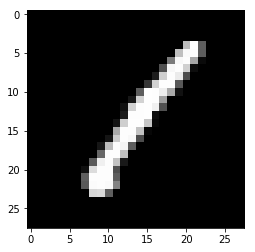

In [32]:
## Visulaize some sapmles

def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawimg(X_train[0])

## Step2. K-NN on MNIST

In [38]:
def distance(query_point,any_point):
    dist=np.sqrt(sum((query_point-any_point)**2))
    return dist

def knn(X_train,Y_train,query_point,k=5):
    value=[]
    m=X_train.shape[0]
    for i in range(m):
        dist=distance(query_point,X_train[i])
        value.append((dist,Y_train[i]))
    sorted_values=sorted(value)
    nearest_k_values=np.array(sorted_values[:k])
    return nearest_k_values

def predict(X_train,Y_train,query_point):
    k_values=knn(X_train,Y_train,query_point)
    #print(k_values)
    # np.unique returns unique values from the array and return_count = True returns the counts of elements of array 
    values=np.unique(k_values[:,1],return_counts=True)
    # argmax() returns the index largest numbers from array of counts
    index=values[1].argmax()
    prediction=values[0][index]
    return prediction



## Step 3.Make Prediction

In [39]:
pre=predict(X_train,Y_train,X_test[0])
print("The actual value is",Y_test[0])
print("Predicted values using KNN is",int(pre))

The actual value is 0
Predicted values using KNN is 0


0


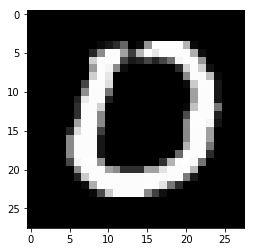

In [45]:
print(Y_test[0])
drawimg(X_test[0])

## Accuracy on testing set

In [46]:
"""def predict_values(X_train,Y_train,X_test):
    m=X_test.shape[0]
    count=0.0
    predicted_values=[]
    for i in range(m):
        val=predict(X_train,Y_train,X_test[i])
        #print(val)
        predicted_values.append(val)
        count=count + 1
        #print(count)
    return predicted_values

predicted_values=predict_values(X_train,Y_train,X_test)"""


'def predict_values(X_train,Y_train,X_test):\n    m=X_test.shape[0]\n    count=0.0\n    predicted_values=[]\n    for i in range(m):\n        val=predict(X_train,Y_train,X_test[i])\n        #print(val)\n        predicted_values.append(val)\n        count=count + 1\n        #print(count)\n    return predicted_values\n\npredicted_values=predict_values(X_train,Y_train,X_test)'